### Getting the tweet data from the stored csv file

In [1]:
import pandas as pd
tweets=pd.read_csv("rajsthan.csv")
tweets.head()

,id,created_at,text
0,861272595198562306,2017-05-07 17:32:43,b'RT @BloodAid: #Jhalawar #Rajasthan Need 2 un...
1,861271974873636865,2017-05-07 17:30:15,b'Majestic #Rajasthan is our editors pick of t...
2,861271946142633984,2017-05-07 17:30:08,b'How to Experience the #Maharaja Life in Bika...
3,861271921710608388,2017-05-07 17:30:02,b'RT @BloodAid: #Jhalawar #Rajasthan Need 2 un...
4,861271215201058817,2017-05-07 17:27:14,b'RT @BloodAid: #Jhalawar #Rajasthan Need 2 un...


In [2]:
tweets.tail()

,id,created_at,text
995,860542477169606656,2017-05-05 17:11:29,b'RT @ashokgehlot51: Why so mch hype ws create...
996,860542221233344512,2017-05-05 17:10:28,b'Unleash the colors of Rajasthan @GulmoharSar...
997,860541885827485696,2017-05-05 17:09:08,b'RT @ashokgehlot51: 470 MOUs n only 38 projec...
998,860541691052384256,2017-05-05 17:08:21,b'RT @ashokgehlot51: ....May his dream of buil...
999,860541591932604418,2017-05-05 17:07:58,b'RT @ashokgehlot51: The promise of providing ...


### Dropping the irrelevant id coloumn from the dataset

In [3]:
tweets.drop('id', axis=1, inplace=True)
tweets.head()

,created_at,text
0,2017-05-07 17:32:43,b'RT @BloodAid: #Jhalawar #Rajasthan Need 2 un...
1,2017-05-07 17:30:15,b'Majestic #Rajasthan is our editors pick of t...
2,2017-05-07 17:30:08,b'How to Experience the #Maharaja Life in Bika...
3,2017-05-07 17:30:02,b'RT @BloodAid: #Jhalawar #Rajasthan Need 2 un...
4,2017-05-07 17:27:14,b'RT @BloodAid: #Jhalawar #Rajasthan Need 2 un...


### Removes puntuation from the text coloumn

In [4]:
import string
tweets["text"]=tweets["text"].str.lower()
tweets["text"] =list(map(lambda x: "".join(l for l in x if l not in string.punctuation),tweets["text"]))
tweets.head()

,created_at,text
0,2017-05-07 17:32:43,brt bloodaid jhalawar rajasthan need 2 units a...
1,2017-05-07 17:30:15,bmajestic rajasthan is our editors pick of the...
2,2017-05-07 17:30:08,bhow to experience the maharaja life in bikane...
3,2017-05-07 17:30:02,brt bloodaid jhalawar rajasthan need 2 units a...
4,2017-05-07 17:27:14,brt bloodaid jhalawar rajasthan need 2 units a...


### Removes links,emoji,special characters and whitespaces

In [5]:
import re
tweets["text"] =list(map(lambda x: re.sub(r'http\S+', '', x),tweets["text"]))
tweets["text"] =list(map(lambda x: re.sub(r'[^\w]', ' ', x),tweets["text"]))
tweets["text"] =list(map(lambda x: re.sub(r'\s+', ' ', x),tweets["text"]))
tweets["text"] =list(map(lambda x: x.replace('brt',''),tweets["text"]))
tweets.head()

,created_at,text
0,2017-05-07 17:32:43,bloodaid jhalawar rajasthan need 2 units a bl...
1,2017-05-07 17:30:15,bmajestic rajasthan is our editors pick of the...
2,2017-05-07 17:30:08,bhow to experience the maharaja life in bikane...
3,2017-05-07 17:30:02,bloodaid jhalawar rajasthan need 2 units a bl...
4,2017-05-07 17:27:14,bloodaid jhalawar rajasthan need 2 units a bl...


### Drop all rows with entry NAN and reset the index

In [6]:
tweets.dropna(axis=0, how='any',inplace=True)
tweets = tweets.reset_index(drop=True)
tweets.head()

,created_at,text
0,2017-05-07 17:32:43,bloodaid jhalawar rajasthan need 2 units a bl...
1,2017-05-07 17:30:15,bmajestic rajasthan is our editors pick of the...
2,2017-05-07 17:30:08,bhow to experience the maharaja life in bikane...
3,2017-05-07 17:30:02,bloodaid jhalawar rajasthan need 2 units a bl...
4,2017-05-07 17:27:14,bloodaid jhalawar rajasthan need 2 units a bl...


### Remove duplicate entries if any

In [7]:
tweets.drop_duplicates(subset='text', keep="last",inplace=True)
tweets = tweets.reset_index(drop=True)
tweets.head()

,created_at,text
0,2017-05-07 17:30:15,bmajestic rajasthan is our editors pick of the...
1,2017-05-07 17:15:25,devladpura what about rajasthan
2,2017-05-07 17:13:37,bwhat about rajasthan
3,2017-05-07 17:04:45,chhatrasagar camp chhatra sagarn rajasthan
4,2017-05-07 16:53:02,bsenior bjp mla from rajasthan ghanshyam tiwar...


# Seperate +/-/neutral words

In [8]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
sid = SentimentIntensityAnalyzer()
pos_word_list=[]
neu_word_list=[]
neg_word_list=[]
for x in tweets["text"]:
    if x:
        for word in TextBlob(x).words:
            if (sid.polarity_scores(word)['compound']) >= 0.1:
                pos_word_list.append(word)
            elif (sid.polarity_scores(word)['compound']) <= -0.1:
                neg_word_list.append(word)
            else:
                neu_word_list.append(word)  

                

/home/ayush/anaconda3/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


### Retaining only POSITIVE and NEUTRAL words with frequency more than 5
### Taking all the NEGATIVE words as they are very few

In [9]:
from collections import Counter
c = Counter(pos_word_list)
pos_data=[]
for key, value in c.items():
    if value>5:
        pos_data.append(key)
pos_word_list=pos_data

In [10]:
c = Counter(neu_word_list)
neu_data=[]
for key, value in c.items():
    if value>5:
        neu_data.append(key)
neu_word_list=neu_data


# Plots word cloud

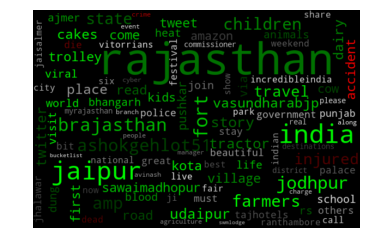

In [11]:
%matplotlib inline
from wordcloud import (WordCloud, get_single_color_func,STOPWORDS)
import matplotlib.pyplot as plt
text=' '.join(tweets['text'])
class GroupedColorFunc(object):
    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [
            (get_single_color_func(color), set(words))
            for (color, words) in color_to_words.items()]

        self.default_color_func = get_single_color_func(default_color)

    def get_color_func(self, word):
        """Returns a single_color_func associated with the word"""
        try:
            color_func = next(
                color_func for (color_func, words) in self.color_func_to_words
                if word in words)
        except StopIteration:
            color_func = self.default_color_func

        return color_func

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)
    

# Since the text is small, collocations are turned off and text is lower-cased
more_stopwords = {'ashokgehlot51''come','couldnt','need','bwhat','units','new','sell','takes','summary','make',
                 'roshni03','bjp','medical','check','bloodaid','killed','httxe2x80xa6','xe2x80xa6','nrajasthan',
                 'go','selling','due','may','top','ba','rajasthanxe2x80xa6','bthe','b6','bwe','xe2x80x93'}
STOPWORDS = STOPWORDS.union(more_stopwords)

wc = WordCloud(width=600, height=400,collocations=False,max_words=100, min_font_size=8,stopwords=STOPWORDS).generate(text)

color_to_words = {
    # words below will be colored with a green single color function
    'white': pos_word_list,
    # will be colored with a red single color function
    'green': neu_word_list,
    'red':neg_word_list
}


# Words that are not in any of the color_to_words values
# will be colored with a grey single color function
default_color = 'black'

# Create a color function with single tone
# grouped_color_func = SimpleGroupedColorFunc(color_to_words, default_color)

# Create a color function with multiple tones
grouped_color_func = GroupedColorFunc(color_to_words, default_color)

# Apply our color function
wc.recolor(color_func=grouped_color_func)

# Plot
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

# Plot frequency datewise

In [12]:
#counts tweets date wise
import re
count07=0
count06=0
count05=0
for x in tweets['created_at']:
    if re.search("2017-05-07",x):
        count07=count07+1
    elif re.search("2017-05-06",x):
        count06=count06+1
    else:
        count05=count05+1

In [13]:
count07+count06+count05

281

Using matplotlib backend: Qt5Agg


Text(0,0.5,'No Of Tweets')

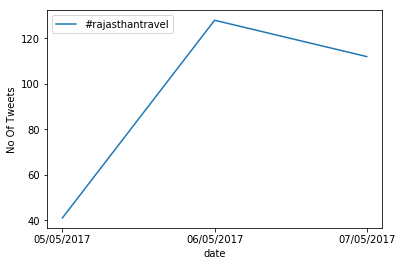

In [14]:
#plots the graph
%matplotlib
import matplotlib.pyplot as plt
values = [count05,count06,count07]
dates = ['05/05/2017','06/05/2017','07/05/2017']
xVals = range(len(values))
py=plt.plot(xVals, values)
plt.xticks(xVals, dates)
plt.legend(py,["#rajasthantravel"])
plt.xlabel("date")
plt.ylabel("No Of Tweets")